<a href="https://colab.research.google.com/github/MariaPetrovskaya/Data-Science-demo/blob/main/Gold_Recovery_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

from sklearn.metrics import make_scorer

from sklearn.dummy import DummyRegressor

Загрузка всех библиотек

In [ ]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_train = df_train.copy()
#
print('обучающая выборка')
print (data_train.shape)
print (data_train.info())
#
print()
print()
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_test = df_test.copy()
#display (data_test.head(5))
print('тестовая выборка')
print (data_test.shape)
print (data_test.info())
#
print()
print()
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
data_full = df_full.copy()
#
print('исходные данные')
print (data_full.shape)
print (data_full.info())
#

обучающая выборка
(14149, 87)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                         

поиск явных дубликатов 

In [ ]:
print ('data_train', data_train.duplicated().sum())
print ('data_test', data_test.duplicated().sum())
print ('data_full', data_full.duplicated().sum())

data_train 0
data_test 0
data_full 0


дубликатов нет

In [ ]:
display (data_train.head(5))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Вижу  проблему большого количества строк с пропусками. 

In [ ]:
def miss_cell(data_frame):
    print('проверка наличия пропусков в данных')
    print(data_frame.isna().mean())    

In [ ]:
miss_cell(data_train)

проверка наличия пропусков в данных
date                                          0.000000
final.output.concentrate_ag                   0.000071
final.output.concentrate_pb                   0.000071
final.output.concentrate_sol                  0.014913
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000071
secondary_cleaner.state.floatbank5_b_air      0.000071
secondary_cleaner.state.floatbank5_b_level    0.000071
secondary_cleaner.state.floatbank6_a_air      0.000141
secondary_cleaner.state.floatbank6_a_level    0.000071
Length: 87, dtype: float64


In [ ]:
miss_cell(data_test)

проверка наличия пропусков в данных
date                                          0.000000
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.depressant              0.000945
primary_cleaner.input.feed_size               0.000000
primary_cleaner.input.xanthate                0.000756
primary_cleaner.state.floatbank8_a_air        0.000000
primary_cleaner.state.floatbank8_a_level      0.000000
primary_cleaner.state.floatbank8_b_air        0.000000
primary_cleaner.state.floatbank8_b_level      0.000000
primary_cleaner.state.floatbank8_c_air        0.000000
primary_cleaner.state.floatbank8_c_level      0.000000
primary_cleaner.state.floatbank8_d_air        0.000000
primary_cleaner.state.floatbank8_d_level      0.000000
rougher.input.feed_ag                         0.000000
rougher.input.feed_pb                         0.000000
rougher.input.feed_rate                       0.000567
rougher.input.feed_size                       0.000189
rougher.input.feed_sol       

In [ ]:
miss_cell(data_full)

проверка наличия пропусков в данных
date                                          0.000000
final.output.concentrate_ag                   0.000051
final.output.concentrate_pb                   0.000051
final.output.concentrate_sol                  0.010854
final.output.concentrate_au                   0.000000
                                                ...   
secondary_cleaner.state.floatbank5_a_level    0.000051
secondary_cleaner.state.floatbank5_b_air      0.000051
secondary_cleaner.state.floatbank5_b_level    0.000051
secondary_cleaner.state.floatbank6_a_air      0.000103
secondary_cleaner.state.floatbank6_a_level    0.000051
Length: 87, dtype: float64


Проверка правильно ли рассчитана что эффективность обогащения: 
  1) По формуле рассчитана на обучающей выборке для признака rougher.output.recovery.
  2) Вычислено MAE между расчётами и значением признака

In [ ]:
concentrate_au = data_train['rougher.output.concentrate_au']
feed_au = data_train['rougher.input.feed_au']
tail_au = data_train['rougher.output.tail_au']
output_recovery = data_train['rougher.output.recovery']
recovery = concentrate_au * (feed_au - tail_au) / feed_au / (concentrate_au - tail_au) * 100
print('Абсолютная средняя ошибка =', mean_absolute_error(output_recovery, recovery))

Абсолютная средняя ошибка = 1.0748911125799084e-14


**Результат** MAE показывает очень малое отклонение, расчетное значение rougher.output.recovery близко с данными из столбца.

Столбцы rougher.output.recovery будут и final.output.recovery есть только в обучающей выборке. Они потребуются в дальнейшем как таргеты в тестовой выборке, при составлении моделей. На этом этапе удобно восстановить их в data_test из общего датасета data_full

In [ ]:
test_data = data_test['date']
target_test = data_full.query('date in @test_data')[['date','rougher.output.recovery', 'final.output.recovery']]
#print(target_test.head()) 
print(target_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 4682 to 15059
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     5290 non-null   object 
 1   rougher.output.recovery  5290 non-null   float64
 2   final.output.recovery    5290 non-null   float64
dtypes: float64(2), object(1)
memory usage: 165.3+ KB
None


In [ ]:
data_test = data_test.merge(target_test, on='date')
#print(data_test.head())
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

Модели машинного обучения не будут работать с данными где есть пропуски, поэтому принято решение очистить датасет data_train и data_test от пропусков. Первоначально попробовала удалить стороки с пропусками.  

In [ ]:
data_train_dropped = data_train.dropna(axis='index')
print (data_train_dropped.shape)
print (data_train_dropped.info())
miss_cell(data_train_dropped)

(11017, 87)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                11017 non-null  object 
 1   final.output.concentrate_ag                         11017 non-null  float64
 2   final.output.concentrate_pb                         11017 non-null  float64
 3   final.output.concentrate_sol                        11017 non-null  float64
 4   final.output.concentrate_au                         11017 non-null  float64
 5   final.output.recovery                               11017 non-null  float64
 6   final.output.tail_ag                                11017 non-null  float64
 7   final.output.tail_pb                                11017 non-null  float64
 8   final.output.tail_sol                               11017 non-nu

In [ ]:
print((14148-11017)/14148 *100, '% процентов выборки удалено')

22.130336443313542 % процентов выборки удалено


**Результат** Удаление всех строк с пропусками прошло успешно, но потери более 22% от выборки, стоит подумать.

In [ ]:
data_test_dropped = data_test.dropna(axis='index')
print (data_test_dropped.shape)
print (data_test_dropped.info())
miss_cell(data_test_dropped)

(5229, 55)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5229 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5229 non-null   object 
 1   primary_cleaner.input.sulfate               5229 non-null   float64
 2   primary_cleaner.input.depressant            5229 non-null   float64
 3   primary_cleaner.input.feed_size             5229 non-null   float64
 4   primary_cleaner.input.xanthate              5229 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5229 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5229 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5229 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5229 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5229 non-null   float64
 10  p

**Результат** слишком высокий процент при удалении строк с пропусками данных, лучше пойти по другому пути и заменить пропуски на среднее. 

**Замена пропусков на среднее** столбец 'data' удаляется в формате 'строка', в дальнейших расчетах он не предполагается, поэтому создаются новые датасеты без этого столбца и с заменой пропусков на среднее. 

In [ ]:
#data_train_new = cover_cells(data_train)
data_train_new = data_train.drop(['date'], axis=1)
data_train_new = data_train_new.fillna(data_train_new.mean())

miss_cell(data_train_new)
data_train_new.info()

проверка наличия пропусков в данных
final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
final.output.recovery                         0.0
                                             ... 
secondary_cleaner.state.floatbank5_a_level    0.0
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 86, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14149 non-null  float64
 1   final.output.concentrate_pb   

In [ ]:
data_test_new = data_test.drop(['date'], axis=1)
data_test_new = data_test_new.fillna(data_test_new.mean())

miss_cell(data_test_new)
data_test_new.info()

проверка наличия пропусков в данных
primary_cleaner.input.sulfate                 0.0
primary_cleaner.input.depressant              0.0
primary_cleaner.input.feed_size               0.0
primary_cleaner.input.xanthate                0.0
primary_cleaner.state.floatbank8_a_air        0.0
primary_cleaner.state.floatbank8_a_level      0.0
primary_cleaner.state.floatbank8_b_air        0.0
primary_cleaner.state.floatbank8_b_level      0.0
primary_cleaner.state.floatbank8_c_air        0.0
primary_cleaner.state.floatbank8_c_level      0.0
primary_cleaner.state.floatbank8_d_air        0.0
primary_cleaner.state.floatbank8_d_level      0.0
rougher.input.feed_ag                         0.0
rougher.input.feed_pb                         0.0
rougher.input.feed_rate                       0.0
rougher.input.feed_size                       0.0
rougher.input.feed_sol                        0.0
rougher.input.feed_au                         0.0
rougher.input.floatbank10_sulfate             0.0
rougher.input.

In [ ]:
data_full_new = data_full.drop(['date'], axis=1)
data_full_new = data_full_new.fillna(data_full_new.mean())

miss_cell(data_full_new)
data_full_new.info()

проверка наличия пропусков в данных
final.output.concentrate_ag                   0.0
final.output.concentrate_pb                   0.0
final.output.concentrate_sol                  0.0
final.output.concentrate_au                   0.0
final.output.recovery                         0.0
                                             ... 
secondary_cleaner.state.floatbank5_a_level    0.0
secondary_cleaner.state.floatbank5_b_air      0.0
secondary_cleaner.state.floatbank5_b_level    0.0
secondary_cleaner.state.floatbank6_a_air      0.0
secondary_cleaner.state.floatbank6_a_level    0.0
Length: 86, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19439 non-null  float64
 1   final.output.concentrate_pb   

**Результаты:** данные подготовлены для дальнейшей работы, пропуски в количественных переменных заменены на среднее

**ВЫВОДЫ**
-  Открыты и изучены файлы и с данными.
-  Проверено, что эффективность обогащения рассчитана правильно: проведен  эффективности обогащения на обучающей выборке для признака rougher.output.recovery, оценен MAE между расчётным и фактическим 
-  Проведена предобработка данных.

## Анализ данных


В тестовой выборке 54 столбца, в обучающей - 86. 
В обучающей модели нужно оставить только те признаки, которые будут в тестовых данных. 


In [ ]:
data_train_new.columns.difference(data_test_new.columns)

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb',
       'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.tail_ag', 'rougher.outp

Различия между test и train - особенность учебного задания. Признаки в тесте - это те признаки, которые будут доступы в продакшене.При обучении модели можно использовать только те признаки, которые есть в тесте, так как только они будут доступны в проде. Поэтому данные заранее были поделены на части и из теста удалили все лишние признаки.

In [ ]:
columns_to_drop = data_train_new.loc[:,'final.output.concentrate_ag':'final.output.concentrate_au']+data_train_new.loc[:,'final.output.tail_ag':'final.output.tail_au']+data_train_new.loc[:,'primary_cleaner.output.concentrate_ag':'primary_cleaner.output.tail_au']+data_train_new.loc[:,'rougher.calculation.sulfate_to_au_concentrate':'rougher.calculation.au_pb_ratio']+data_train_new.loc[:,'rougher.output.concentrate_ag':'rougher.output.concentrate_au']+data_train_new.loc[:,'rougher.output.tail_ag':'rougher.output.tail_au']+data_train_new.loc[:,'secondary_cleaner.output.tail_ag':'secondary_cleaner.output.tail_au']
columns_to_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 32 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         0 non-null      float64
 1   final.output.concentrate_au                         0 non-null      float64
 2   final.output.concentrate_pb                         0 non-null      float64
 3   final.output.concentrate_sol                        0 non-null      float64
 4   final.output.tail_ag                                0 non-null      float64
 5   final.output.tail_au                                0 non-null      float64
 6   final.output.tail_pb                                0 non-null      float64
 7   final.output.tail_sol                               0 non-null      float64
 8   primary_cleaner.output.concentrate_ag               0 non-null      float64


**Результат** составлен список столбцов для удаления из data_train_new

Анализ показателей в обучающей выборке.

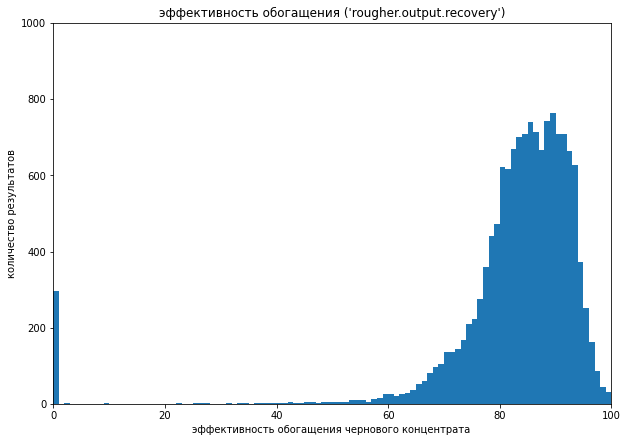

In [ ]:
plt.figure(figsize=[10,7])

plt.hist(data_train_new['rougher.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 1000])

plt.xlabel("эффективность обогащения чернового концентрата ")
plt.ylabel("количество результатов")

plt.title("эффективность обогащения ('rougher.output.recovery')")
plt.show()

По гистограмме видно, что в столбце rougher.output.recovery много нулевых значений, рассмотрим их подробнее.

In [ ]:
print('количество нулевых значений в данных rougher.output.recovery', data_train_new[data_train_new['rougher.output.recovery'] == 0]['rougher.output.recovery'].count())
#print(data_train_new[data_train_new['rougher.output.recovery'] == 0].count())
data_train_new[data_train_new['rougher.output.recovery'] == 0].head()


количество нулевых значений в данных rougher.output.recovery 297


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,131.251366,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,141.184039,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
47,4.591462,10.628846,5.688961,46.663335,55.088448,10.694584,1.671644,17.910312,2.686782,126.397495,...,13.997488,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665
48,5.296830,10.597469,9.202849,44.015642,41.962008,11.975654,1.846558,8.138408,2.889469,69.411904,...,14.006476,-549.388727,11.975967,-550.778624,9.989726,-499.607365,7.958252,-498.882560,11.967977,-599.440603
49,8.162896,8.877528,9.202849,40.715973,49.884856,10.381465,1.024030,12.974257,2.739224,116.517762,...,13.984906,-550.563329,11.999730,-550.549773,9.941869,-503.282068,8.018850,-500.970716,11.991078,-598.475929


In [ ]:
print('количество нулевых значений в данных rougher.output.concentrate_au', data_train_new[data_train_new['rougher.output.concentrate_au'] == 0]['rougher.output.concentrate_au'].count())
#print(data_train_new[data_train_new['rougher.output.concentrate_au'] == 0].count())
data_train_new[data_train_new['rougher.output.concentrate_au'] == 0].head()

количество нулевых значений в данных rougher.output.concentrate_au 297


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,131.251366,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,141.184039,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
47,4.591462,10.628846,5.688961,46.663335,55.088448,10.694584,1.671644,17.910312,2.686782,126.397495,...,13.997488,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665
48,5.296830,10.597469,9.202849,44.015642,41.962008,11.975654,1.846558,8.138408,2.889469,69.411904,...,14.006476,-549.388727,11.975967,-550.778624,9.989726,-499.607365,7.958252,-498.882560,11.967977,-599.440603
49,8.162896,8.877528,9.202849,40.715973,49.884856,10.381465,1.024030,12.974257,2.739224,116.517762,...,13.984906,-550.563329,11.999730,-550.549773,9.941869,-503.282068,8.018850,-500.970716,11.991078,-598.475929


In [ ]:
data_train_new = data_train_new.drop(data_train_new[data_train_new['rougher.output.recovery'] == 0].index)
data_train_new[data_train_new['rougher.output.recovery'] == 0].head()
data_train_new[data_train_new['rougher.output.concentrate_au'] == 0].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


**Результат** удалены 297 строк с нулевым значением 'rougher.output.recovery'

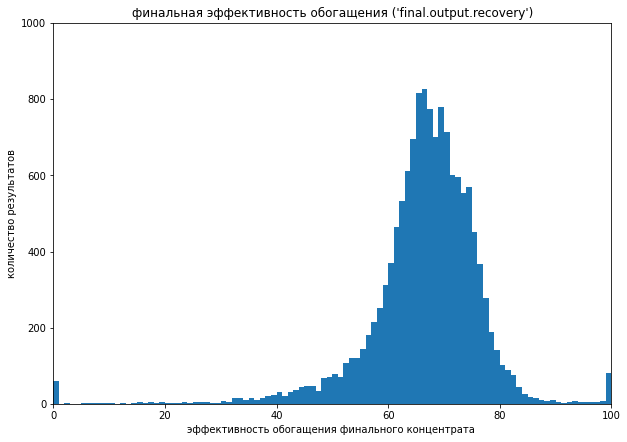

In [ ]:
plt.figure(figsize=[10,7])

plt.hist(data_train_new['final.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 1000])

plt.xlabel("эффективность обогащения финального концентрата ")
plt.ylabel("количество результатов")

plt.title("финальная эффективность обогащения ('final.output.recovery')")
plt.show()

Концентрация веществ на этапах обработки по данным в data_train_new

In [ ]:
print('количество нулевых значений в данных final.output.recovery', data_train_new[data_train_new['final.output.recovery'] == 0]['final.output.recovery'].count())
#data_train_new[data_train_new['final.output.recovery'] == 0]['final.output.recovery'].count()
#print(data_train_new[data_train_new['final.output.recovery'] == 0].count())

data_train_new[data_train_new['final.output.recovery'] == 0].head()

количество нулевых значений в данных final.output.recovery 57


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
644,0.0,0.0,0.0,0.0,0.0,8.894029,0.843584,15.417342,1.779052,133.610147,...,21.991762,-399.587122,21.988937,-401.366408,22.995012,-399.370680,20.966863,-399.308354,24.987274,-399.619808
1193,0.0,0.0,0.0,0.0,0.0,10.817313,1.462800,16.407607,2.984504,111.502432,...,11.979352,-453.431061,12.003445,-450.179844,11.982937,-449.856468,9.927727,-450.521700,19.971682,-500.685521
1194,0.0,0.0,0.0,0.0,0.0,10.436792,1.207636,17.800392,2.747294,110.586754,...,12.034636,-446.590944,12.130405,-449.684812,11.844983,-450.881424,9.916784,-449.542871,20.004767,-500.137068
1195,0.0,0.0,0.0,0.0,0.0,10.637073,1.405778,17.195897,2.791440,104.202288,...,12.016716,-496.613149,12.055535,-496.908551,12.091144,-496.404140,9.976074,-496.783155,19.921634,-500.769011
1196,0.0,0.0,0.0,0.0,0.0,10.530320,1.461550,17.556860,2.682127,102.438023,...,11.993898,-500.427824,12.083824,-500.162537,12.078809,-499.903743,10.075259,-499.540325,20.039788,-499.932405


In [ ]:
data_train_new = data_train_new.drop(data_train_new[data_train_new['final.output.recovery'] == 0].index)
data_train_new[data_train_new['final.output.recovery'] == 0].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


**Результат** обнаружено и удалено 57 строк с нулевыми значениями в final.output.recovery

In [ ]:
print('количество нулевых значений в данных primary_cleaner.output.concentrate_au', data_train_new[data_train_new['primary_cleaner.output.concentrate_au'] == 0]['primary_cleaner.output.concentrate_au'].count())

количество нулевых значений в данных primary_cleaner.output.concentrate_au 70


In [ ]:
print('количество нулевых значений в данных secondary_cleaner.output.tail_au', data_train_new[data_train_new['secondary_cleaner.output.tail_au'] == 0]['secondary_cleaner.output.tail_au'].count())

количество нулевых значений в данных secondary_cleaner.output.tail_au 707


посчитано количество нулевых значений в primary_cleaner.output.concentrate_au и secondary_cleaner.output.tail_au

In [ ]:
data_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13795 entries, 0 to 14148
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         13795 non-null  float64
 1   final.output.concentrate_pb                         13795 non-null  float64
 2   final.output.concentrate_sol                        13795 non-null  float64
 3   final.output.concentrate_au                         13795 non-null  float64
 4   final.output.recovery                               13795 non-null  float64
 5   final.output.tail_ag                                13795 non-null  float64
 6   final.output.tail_pb                                13795 non-null  float64
 7   final.output.tail_sol                               13795 non-null  float64
 8   final.output.tail_au                                13795 non-null  float64


**Результаты** Датасеты подготовлены к дальнейшей работе: удалены строки с нулевыми (отсутствующими данными) 

**Исследование изменений концентрация металлов (Au, Ag, Pb) на различных этапах очистки**

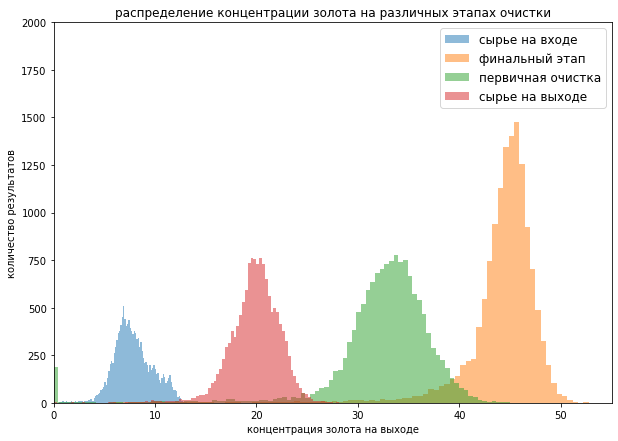

In [ ]:
plt.figure(figsize=[10,7]) 
plt.hist(data_train_new['rougher.input.feed_au'], bins=100, label = 'сырье на входе', alpha=.5)
plt.hist(data_train_new['final.output.concentrate_au'], bins=100, label = 'финальный этап', alpha=.5)
plt.hist(data_train_new['primary_cleaner.output.concentrate_au'], bins=100, label = 'первичная очистка', alpha=.5)
plt.hist(data_train_new['rougher.output.concentrate_au'], bins=100, label = 'сырье на выходе', alpha=.5)

plt.xlim([0, 55])
plt.ylim([0, 2000])

plt.xlabel("концентрация золота на выходе")
plt.ylabel("количество результатов")

plt.legend(loc='upper right', fontsize='large')

plt.title("распределение концентрации золота на различных этапах очистки")
plt.show()

**Результат** На графиках видно повышение концентрации золота с каждым этапом очистки. 

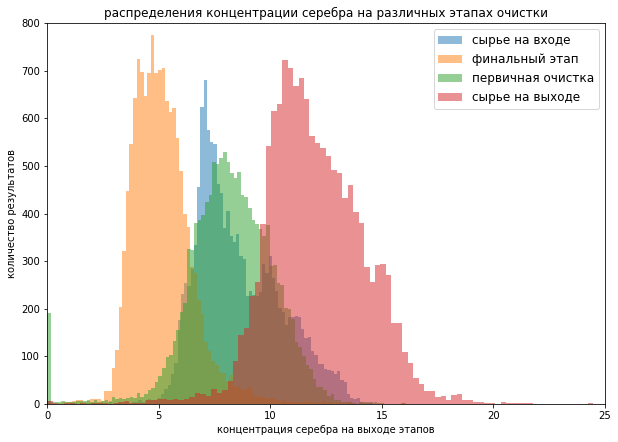

In [ ]:
plt.figure(figsize=[10,7])
plt.hist(data_train_new['rougher.input.feed_ag'], bins=100, label = 'сырье на входе', alpha=.5)
plt.hist(data_train_new['final.output.concentrate_ag'], bins=100, label = 'финальный этап', alpha=.5)
plt.hist(data_train_new['primary_cleaner.output.concentrate_ag'], bins=100, label = 'первичная очистка', alpha=.5)
plt.hist(data_train_new['rougher.output.concentrate_ag'], bins=100, label = 'сырье на выходе', alpha=.5)

plt.xlim([0, 25])
plt.ylim([0, 800])

plt.xlabel("концентрация серебра на выходе этапов")
plt.ylabel("количество результатов")

plt.legend(loc='upper right', fontsize='large')

plt.title("распределения концентрации серебра на различных этапах очистки")
plt.show()

Конецентрация серебра наиболее низкая на финальном этапе. Целевым металом является золото, оно очищается от всех прочих, включая серебро.

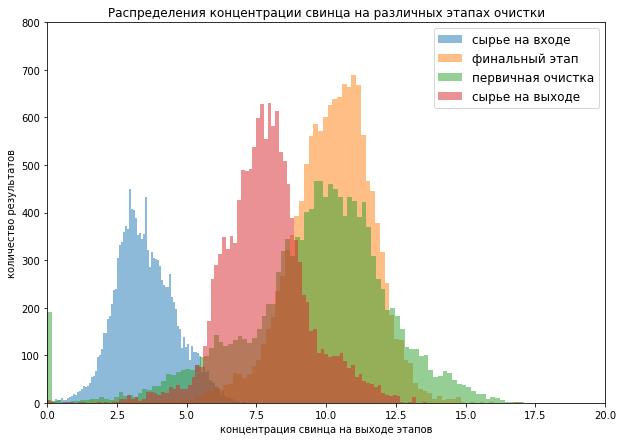

In [ ]:
plt.figure(figsize=[10,7])
plt.hist(data_train_new['rougher.input.feed_pb'], bins=100, label = 'сырье на входе', alpha=.5)
plt.hist(data_train_new['final.output.concentrate_pb'], bins=100, label = 'финальный этап', alpha=.5)
plt.hist(data_train_new['primary_cleaner.output.concentrate_pb'], bins=100, label = 'первичная очистка', alpha=.5)
plt.hist(data_train_new['rougher.output.concentrate_pb'], bins=100, label = 'сырье на выходе', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 800])

plt.xlabel("концентрация свинца на выходе этапов")
plt.ylabel("количество результатов")

plt.legend(loc='upper right', fontsize='large')

plt.title("Распределения концентрации свинца на различных этапах очистки")
plt.show()

**Распределения размеров гранул сырья на обучающей и тестовой выборках**


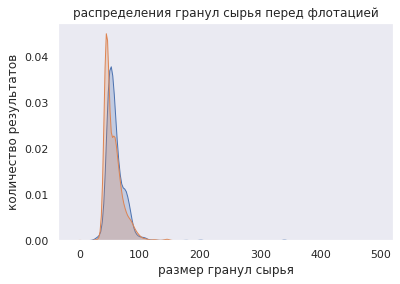

In [ ]:
sn.set(style='dark')
res = sn.kdeplot(data_train_new['rougher.input.feed_size'],shade=True,cmap="Oranges_r")
res = sn.kdeplot(data_test_new['rougher.input.feed_size'],shade=True,cmap="Blues")
plt.xlabel("размер гранул сырья")
plt.ylabel("количество результатов")



plt.title("распределения гранул сырья перед флотацией")
plt.show()

На этапе перед флотацией распределения по форме похожи, но отличаются по количеству (что понятно, т.к. у выборок разные размеры) 

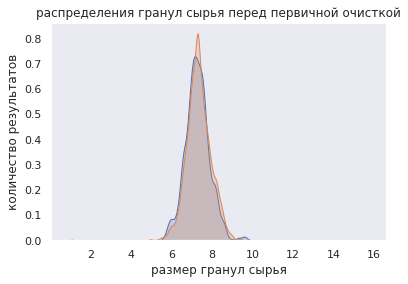

In [ ]:
sn.set(style='dark')
res = sn.kdeplot(data_test_new['primary_cleaner.input.feed_size'],shade=True,cmap="Oranges_r")
res = sn.kdeplot(data_train_new['primary_cleaner.input.feed_size'],shade=True,cmap="Blues")
plt.xlabel("размер гранул сырья")
plt.ylabel("количество результатов")

plt.title("распределения гранул сырья перед первичной очисткой")
plt.show()

Распределения перед первичной очисткой похожи на нормальные распределения с центром примерно в одном месте, иллюстрируют соответсвие выборок

В обучающей выборке нет столбцов с суммарными концентрациями, их нужно добавить


На этапе сырья 

In [ ]:
rougher_output_concentrate_sum_train = (data_train_new['rougher.output.concentrate_au'] + 
                                        data_train_new['rougher.output.concentrate_ag'] + 
                                        data_train_new['rougher.output.concentrate_pb'] +
                                        data_train_new['rougher.output.concentrate_sol'])

В черновом концентрате 

In [ ]:
primary_cleaner_output_concentrate_sum_train = (data_train_new['primary_cleaner.output.concentrate_au'] + 
                                                data_train_new['primary_cleaner.output.concentrate_ag'] + 
                                                data_train_new['primary_cleaner.output.concentrate_pb'] +
                                                data_train_new['primary_cleaner.output.concentrate_sol'])

На финальном этапе 

In [ ]:
final_output_concentrate_sum_train = (data_train_new['final.output.concentrate_au'] + 
                                      data_train_new['final.output.concentrate_ag'] + 
                                      data_train_new['final.output.concentrate_pb'] +
                                      data_train_new['final.output.concentrate_sol'])

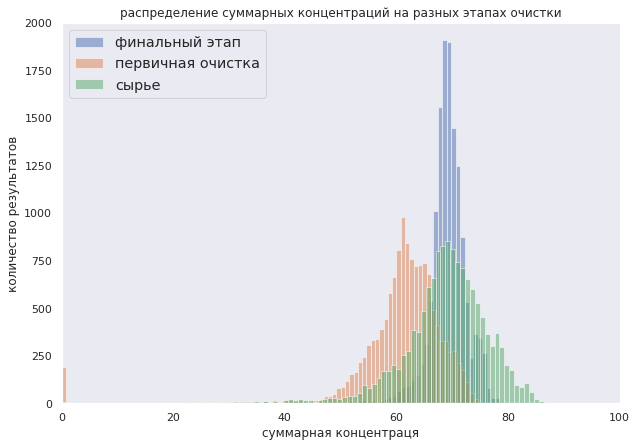

In [ ]:
plt.figure(figsize=[10,7])

plt.hist(final_output_concentrate_sum_train, bins=100, label = 'финальный этап', alpha=.5)
plt.hist(primary_cleaner_output_concentrate_sum_train, bins=100, label = 'первичная очистка', alpha=.5)
plt.hist(rougher_output_concentrate_sum_train, bins=100, label = 'сырье', alpha=.5)

plt.xlim([0, 100])
plt.ylim([0, 2000])

plt.xlabel("суммарная концентраця")
plt.ylabel("количество результатов")

plt.legend(loc='upper left', fontsize='large')

plt.title("распределение суммарных концентраций на разных этапах очистки")
plt.show()

Виден выброс нулевого значения label = 'первичная очистка' - primary_cleaner_output. Ранее замечено количество нулевых значений в данных primary_cleaner.output.concentrate_au 70). Удалим их на этом этапе.

In [ ]:
data_train_new = data_train_new.drop(data_train_new[data_train_new['primary_cleaner.output.concentrate_au'] == 0].index)
data_train_new[data_train_new['primary_cleaner.output.concentrate_au'] == 0].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


**ВЫВОДЫ**
-  Выявлена разница в признаках между выборками.
-  Составлен список столбцов для удаления из data_train_new
-  Датасеты подготовлены к дальнейшей работе: удалены строки с нулевыми (отсутствующими данными)
-  Рассмотрено изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки.
-  Проведено сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.
-  Исследована суммарная концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

## Модели

Выделим столбцы из тестовой выборки, по которым будет обучаться модель: создадим новый датасет data_train_model. (Столбец data ранее был удален). 

In [ ]:
columns_to_delete=set(columns_to_drop.columns)
data_train_model = data_train_new.drop(columns_to_delete, axis=1)
print(data_train_model.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13725 entries, 0 to 14148
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       13725 non-null  float64
 1   primary_cleaner.input.sulfate               13725 non-null  float64
 2   primary_cleaner.input.depressant            13725 non-null  float64
 3   primary_cleaner.input.feed_size             13725 non-null  float64
 4   primary_cleaner.input.xanthate              13725 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      13725 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    13725 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      13725 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    13725 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      13725 non-null  float64
 10  primary_cl

**Результат** подготовлен новый датасет data_train_model

Для предсказания rougher.output.recovery будут использоватся данные из стобцов этапа rougher. Для вычисления final.output.recovery будут использованы все столбцы из тестовой выборки.

Обнаружена проблема не совпадения порядка столбцов train и test 

In [ ]:
for column in data_train_model:
    print(column)

final.output.recovery
primary_cleaner.input.sulfate
primary_cleaner.input.depressant
primary_cleaner.input.feed_size
primary_cleaner.input.xanthate
primary_cleaner.state.floatbank8_a_air
primary_cleaner.state.floatbank8_a_level
primary_cleaner.state.floatbank8_b_air
primary_cleaner.state.floatbank8_b_level
primary_cleaner.state.floatbank8_c_air
primary_cleaner.state.floatbank8_c_level
primary_cleaner.state.floatbank8_d_air
primary_cleaner.state.floatbank8_d_level
rougher.input.feed_ag
rougher.input.feed_pb
rougher.input.feed_rate
rougher.input.feed_size
rougher.input.feed_sol
rougher.input.feed_au
rougher.input.floatbank10_sulfate
rougher.input.floatbank10_xanthate
rougher.input.floatbank11_sulfate
rougher.input.floatbank11_xanthate
rougher.output.recovery
rougher.state.floatbank10_a_air
rougher.state.floatbank10_a_level
rougher.state.floatbank10_b_air
rougher.state.floatbank10_b_level
rougher.state.floatbank10_c_air
rougher.state.floatbank10_c_level
rougher.state.floatbank10_d_air
rou

In [ ]:
%%time
for column in data_test_new:
    print(column)

primary_cleaner.input.sulfate
primary_cleaner.input.depressant
primary_cleaner.input.feed_size
primary_cleaner.input.xanthate
primary_cleaner.state.floatbank8_a_air
primary_cleaner.state.floatbank8_a_level
primary_cleaner.state.floatbank8_b_air
primary_cleaner.state.floatbank8_b_level
primary_cleaner.state.floatbank8_c_air
primary_cleaner.state.floatbank8_c_level
primary_cleaner.state.floatbank8_d_air
primary_cleaner.state.floatbank8_d_level
rougher.input.feed_ag
rougher.input.feed_pb
rougher.input.feed_rate
rougher.input.feed_size
rougher.input.feed_sol
rougher.input.feed_au
rougher.input.floatbank10_sulfate
rougher.input.floatbank10_xanthate
rougher.input.floatbank11_sulfate
rougher.input.floatbank11_xanthate
rougher.state.floatbank10_a_air
rougher.state.floatbank10_a_level
rougher.state.floatbank10_b_air
rougher.state.floatbank10_b_level
rougher.state.floatbank10_c_air
rougher.state.floatbank10_c_level
rougher.state.floatbank10_d_air
rougher.state.floatbank10_d_level
rougher.state.f

Установим в data_train_model такой де порядок столбцов, как и в data_test_new

In [ ]:
%%time
data_train_model = data_train_model.reindex(columns=['primary_cleaner.input.sulfate','primary_cleaner.input.depressant','primary_cleaner.input.feed_size','primary_cleaner.input.xanthate',
'primary_cleaner.state.floatbank8_a_air',
'primary_cleaner.state.floatbank8_a_level',
'primary_cleaner.state.floatbank8_b_air',
'primary_cleaner.state.floatbank8_b_level',
'primary_cleaner.state.floatbank8_c_air',
'primary_cleaner.state.floatbank8_c_level',
'primary_cleaner.state.floatbank8_d_air',
'primary_cleaner.state.floatbank8_d_level',
'rougher.input.feed_ag',
'rougher.input.feed_pb',
'rougher.input.feed_rate',
'rougher.input.feed_size',
'rougher.input.feed_sol',
'rougher.input.feed_au',
'rougher.input.floatbank10_sulfate',
'rougher.input.floatbank10_xanthate',
'rougher.input.floatbank11_sulfate',
'rougher.input.floatbank11_xanthate',
'rougher.state.floatbank10_a_air',
'rougher.state.floatbank10_a_level',
'rougher.state.floatbank10_b_air',
'rougher.state.floatbank10_b_level',
'rougher.state.floatbank10_c_air',
'rougher.state.floatbank10_c_level',
'rougher.state.floatbank10_d_air',
'rougher.state.floatbank10_d_level',
'rougher.state.floatbank10_e_air',
'rougher.state.floatbank10_e_level',
'rougher.state.floatbank10_f_air',
'rougher.state.floatbank10_f_level',
'secondary_cleaner.state.floatbank2_a_air',
'secondary_cleaner.state.floatbank2_a_level',
'secondary_cleaner.state.floatbank2_b_air',
'secondary_cleaner.state.floatbank2_b_level',
'secondary_cleaner.state.floatbank3_a_air',
'secondary_cleaner.state.floatbank3_a_level',
'secondary_cleaner.state.floatbank3_b_air',
'secondary_cleaner.state.floatbank3_b_level',
'secondary_cleaner.state.floatbank4_a_air',
'secondary_cleaner.state.floatbank4_a_level',
'secondary_cleaner.state.floatbank4_b_air',
'secondary_cleaner.state.floatbank4_b_level',
'secondary_cleaner.state.floatbank5_a_air',
'secondary_cleaner.state.floatbank5_a_level',
'secondary_cleaner.state.floatbank5_b_air',
'secondary_cleaner.state.floatbank5_b_level',
'secondary_cleaner.state.floatbank6_a_air',
'secondary_cleaner.state.floatbank6_a_level',
'rougher.output.recovery',
'final.output.recovery'])
print(data_train_model.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13725 entries, 0 to 14148
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               13725 non-null  float64
 1   primary_cleaner.input.depressant            13725 non-null  float64
 2   primary_cleaner.input.feed_size             13725 non-null  float64
 3   primary_cleaner.input.xanthate              13725 non-null  float64
 4   primary_cleaner.state.floatbank8_a_air      13725 non-null  float64
 5   primary_cleaner.state.floatbank8_a_level    13725 non-null  float64
 6   primary_cleaner.state.floatbank8_b_air      13725 non-null  float64
 7   primary_cleaner.state.floatbank8_b_level    13725 non-null  float64
 8   primary_cleaner.state.floatbank8_c_air      13725 non-null  float64
 9   primary_cleaner.state.floatbank8_c_level    13725 non-null  float64
 10  primary_cl

In [ ]:
%%time
def part_sMAPE (final_real, final_predicted):
    n = final_real.shape[0]
    return ((2*abs(final_real - final_predicted)/ (abs(final_real) + abs(final_predicted))).sum() * 100 / n)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


In [ ]:
%%time
def sMAPE_score(rougher,final):
    return rougher * 0.25 + final * 0.75

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


**Результат** созданы функции для расчета основной метрики

In [ ]:
%%time
target_train_final=data_train_model['final.output.recovery']
target_valid_final=data_test_new['final.output.recovery']
features_train_final=data_train_model.drop(['final.output.recovery'] , axis=1)
features_valid_final=data_test_new.drop(['final.output.recovery'] , axis=1)

CPU times: user 2.91 ms, sys: 0 ns, total: 2.91 ms
Wall time: 2.85 ms


In [ ]:
%%time
target_train_rougher=data_train_model['rougher.output.recovery']
target_valid_rougher=data_test_new['rougher.output.recovery']
features_train_rougher=data_train_model.drop(['rougher.output.recovery'] , axis=1)
features_valid_rougher=data_test_new.drop(['rougher.output.recovery'] , axis=1)

CPU times: user 448 µs, sys: 4.08 ms, total: 4.53 ms
Wall time: 4.41 ms


In [ ]:
%%time
model = RandomForestRegressor(random_state=12345)
scores = cross_val_score(model, features_train_final, target_train_final, cv=5, scoring = make_scorer(part_sMAPE, greater_is_better=False))
final_score = pd.Series(scores).mean()
print(final_score)



-9.262576923255029
CPU times: user 3min 57s, sys: 620 ms, total: 3min 57s
Wall time: 3min 58s


настройка параметра scoring для частного sMAPE

**Модель 1 : линейная регрессия**

для прогноза эффективности обогащения финального концентрата final.output.recovery

In [ ]:
model = LinearRegression()
regressor = LinearRegression()
model.fit(features_train_final, target_train_final)
scores = cross_val_score(model, features_train_final, target_train_final, cv=5, scoring = make_scorer(part_sMAPE, greater_is_better=False))
final_score = pd.Series(scores).mean()

print("final.output.recovery")
print('метрика частного sMAPE LinearRegression =', - final_score)


final.output.recovery
метрика частного sMAPE LinearRegression = 8.397958813079292


для прогноза эффективности обогащения чернового концентрата rougher.output.recovery

In [ ]:
model = LinearRegression()
regressor = LinearRegression()
model.fit(features_train_rougher, target_train_rougher)
scores = cross_val_score(model, features_train_rougher, target_train_rougher, cv=5, scoring = make_scorer(part_sMAPE, greater_is_better=False))
rougher_score = pd.Series(scores).mean()

print("rougher.output.recovery") 
print('метрика частного sMAPE LinearRegression =',- cross_val_score(regressor, features_train_rougher, target_train_rougher, cv=5, scoring=make_scorer(part_sMAPE, greater_is_better=False)).mean())


rougher.output.recovery
метрика частного sMAPE LinearRegression = 5.839112136627217


основная метрика

In [ ]:
print('основная метрика')
res1 = sMAPE_score(rougher_score, final_score)
print('sMAPE для линейной регресии',- res1)

основная метрика
sMAPE для линейной регресии 7.7582471439662735


**Модель 2: Линейная регрессия и использованием StandardScaler**

In [ ]:
model = LinearRegression()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_train_final, target_train_final)
print(scaler.transform(scaled_data))
model.fit(features_train_final, target_train_final)
scscores = cross_val_score(model, features_train_final, target_train_final, cv=5, scoring = make_scorer(part_sMAPE, greater_is_better=False))
final_scscore = pd.Series(scscores).mean()

print("final.output.recovery")
print('метрика частного sMAPE LinearRegression =', - final_scscore)



[[ -3.43155241  -2.53095978 -12.06938263 ...  -3.60681753  13.64108896
  -10.56048065]
 [ -3.43251096  -2.51603009 -12.06938263 ...  -3.61149594  13.64552363
  -10.56464313]
 [ -3.43369668  -2.42535905 -12.06938263 ...  -3.61056904  13.64432232
  -10.56465812]
 ...
 [ -3.44559283  -2.72413546 -14.04085016 ...  -3.42824384  13.71749793
  -10.53242447]
 [ -3.45003943  -2.72155299 -14.04085016 ...  -3.42753742  13.71815197
  -10.51719817]
 [ -3.45241956  -2.71312676 -14.04085016 ...  -3.42826065  13.71920219
  -10.52259858]]
final.output.recovery
метрика частного sMAPE LinearRegression = 8.397958813079292


In [ ]:
model = LinearRegression()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features_train_rougher, target_train_rougher)
print(scaler.transform(scaled_data))
model.fit(features_train_rougher, target_train_rougher)
rouscores = cross_val_score(model, features_train_rougher, target_train_rougher, cv=5, scoring = make_scorer(part_sMAPE, greater_is_better=False))
rouscore = pd.Series(rouscores).mean()

print("rougher.output.recovery")
print('метрика частного sMAPE LinearRegression =', - rouscore)


[[ -3.43155241  -2.53095978 -12.06938263 ...  -3.60681753  13.64108896
   -7.15128271]
 [ -3.43251096  -2.51603009 -12.06938263 ...  -3.61149594  13.64552363
   -7.16606891]
 [ -3.43369668  -2.42535905 -12.06938263 ...  -3.61056904  13.64432232
   -7.17940242]
 ...
 [ -3.44559283  -2.72413546 -14.04085016 ...  -3.42824384  13.71749793
   -7.19232428]
 [ -3.45003943  -2.72155299 -14.04085016 ...  -3.42753742  13.71815197
   -7.20947536]
 [ -3.45241956  -2.71312676 -14.04085016 ...  -3.42826065  13.71920219
   -7.15429513]]
rougher.output.recovery
метрика частного sMAPE LinearRegression = 5.839112136627217


In [ ]:
print('основная метрика')
res1 = sMAPE_score(rouscore, final_scscore)
print('sMAPE для линейной регресии',- res1)

основная метрика
sMAPE для линейной регресии 7.7582471439662735


Проверяем на простой модели линейной регрессии и с StandardScaler. Влияния StandardScaler не наблюдается. 

**Модель 3 "Случайный лес" с меняющимися гиперпараметрами**

In [ ]:
%%time

best_mod = None
best_res = 100
best_dep = 0
for depth in range(2, 10, 2):
    for est in range(5, 50, 5):
        model = RandomForestRegressor(n_estimators=est, 
        max_depth=depth, random_state=12345)
        model.fit(features_train_final, target_train_final)
        scores_for = cross_val_score(model, features_train_final, target_train_final, cv=5, scoring = make_scorer(part_sMAPE, greater_is_better=False))
        final_forest = pd.Series(scores_for).mean()
        
        print("final.output.recovery")
        print('метрика частного sMAPE RandomForestRegressor =', - final_forest)

        model = RandomForestRegressor(n_estimators=est, 
        max_depth=depth, random_state=12345)
        model.fit(features_train_rougher, target_train_rougher)
        scores_for = cross_val_score(model, features_train_rougher, target_train_rougher, cv=5, scoring = make_scorer(part_sMAPE, greater_is_better=False))
        rougher_forest = pd.Series(scores_for).mean()
        
        print("rougher.output.recovery")
        print('метрика частного sMAPE RandomForestRegressor =',- rougher_forest)
        forest_result = -(sMAPE_score(rougher_forest, final_forest))
        print('основная метрика sMAPE',forest_result)
        if forest_result < best_res:
            best_mod = model
            best_res = forest_result
            best_deр = depth
print('Cамая эффективная модель - best_mod',best_mod)
print("sMAPE наилучшей модели:", best_res)

final.output.recovery
метрика частного sMAPE RandomForestRegressor = 8.096701848280457
rougher.output.recovery
метрика частного sMAPE RandomForestRegressor = 5.99913931685752
основная метрика sMAPE 7.5723112154247225
final.output.recovery
метрика частного sMAPE RandomForestRegressor = 8.056016047733399
rougher.output.recovery
метрика частного sMAPE RandomForestRegressor = 5.944878097670286
основная метрика sMAPE 7.528231560217621
final.output.recovery
метрика частного sMAPE RandomForestRegressor = 8.044179424150375
rougher.output.recovery
метрика частного sMAPE RandomForestRegressor = 5.9316949111967965
основная метрика sMAPE 7.51605829591198
final.output.recovery
метрика частного sMAPE RandomForestRegressor = 8.006463018378051
rougher.output.recovery
метрика частного sMAPE RandomForestRegressor = 5.901626179351243
основная метрика sMAPE 7.48025380862135
final.output.recovery
метрика частного sMAPE RandomForestRegressor = 8.02360388274622
rougher.output.recovery
метрика частного sMAPE 

**Модель 4: Дерево решений с меняющимися гиперпараметрами**

In [ ]:
%%time

best_model = None
best_result = 100
best_depth = 0
for depth in range(1, 10):
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    model.fit(features_train_final, target_train_final)
    scores = cross_val_score(model, features_train_final, target_train_final, cv=5, scoring = make_scorer(part_sMAPE, greater_is_better=False))
    final_tree = pd.Series(scores).mean()
   
    print("final.output.recovery")
    print('метрика частного sMAPE DecisionTreeRegressor =', - cross_val_score(regressor, features_train_final, target_train_final, cv=5, scoring=make_scorer(part_sMAPE, greater_is_better=False)).mean())
    
    model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    model.fit(features_train_rougher, target_train_rougher)
    scores = cross_val_score(model, features_train_rougher, target_train_rougher, cv=5, scoring = make_scorer(part_sMAPE, greater_is_better=False))
    rougher_tree= pd.Series(scores).mean()
    
    print("rougher.output.recovery")
    print('метрика частного sMAPE DecisionTreeRegressor =',- cross_val_score(regressor, features_train_rougher, target_train_rougher, cv=5, scoring=make_scorer(part_sMAPE, greater_is_better=False)).mean())
    tree_result = -(sMAPE_score(rougher_tree, final_tree))
    print('основная метрика sMAPE',tree_result)
    if tree_result < best_result:
        best_model = model
        best_result = tree_result
        best_deрth = depth
print('Cамая эффективная модель - best_mod',best_model)
print("sMAPE наилучшей модели:", best_result)

final.output.recovery
метрика частного sMAPE DecisionTreeRegressor = 8.397958813079292
rougher.output.recovery
метрика частного sMAPE DecisionTreeRegressor = 5.839112136627217
основная метрика sMAPE 8.667599328911317
final.output.recovery
метрика частного sMAPE DecisionTreeRegressor = 8.397958813079292
rougher.output.recovery
метрика частного sMAPE DecisionTreeRegressor = 5.839112136627217
основная метрика sMAPE 7.740375988606353
final.output.recovery
метрика частного sMAPE DecisionTreeRegressor = 8.397958813079292
rougher.output.recovery
метрика частного sMAPE DecisionTreeRegressor = 5.839112136627217
основная метрика sMAPE 7.772390869672057
final.output.recovery
метрика частного sMAPE DecisionTreeRegressor = 8.397958813079292
rougher.output.recovery
метрика частного sMAPE DecisionTreeRegressor = 5.839112136627217
основная метрика sMAPE 7.983415154986233
final.output.recovery
метрика частного sMAPE DecisionTreeRegressor = 8.397958813079292
rougher.output.recovery
метрика частного sMAP

**Выбор модели**

По условиям проекта основная метрика sMAPE. По этому критерию самая эффективная модель - best_mod RandomForestRegressor(max_depth=4, n_estimators=35, random_state=12345)
sMAPE наилучшей модели: 7.280561751916645

In [ ]:
model = RandomForestRegressor(n_estimators=35, 
max_depth=4, random_state=12345)
model.fit(features_train_final, target_train_final)
scores_for1 = cross_val_score(model, features_train_final, target_train_final, cv=5, scoring = make_scorer(part_sMAPE, greater_is_better=False))
final_forest1 = pd.Series(scores_for1).mean()
print("final.output.recovery")
print('метрика частного sMAPE RandomForestRegressor на трейне выборке =', - final_forest1)
predicted_final = model.predict(features_valid_final)
res_fin = part_sMAPE(target_valid_final, predicted_final)
print("final.output.recovery")
print('метрика частного sMAPE RandomForestRegressor на тестовой выборке =', res_fin)
print()
model = RandomForestRegressor(n_estimators=35, 
max_depth=4, random_state=12345)
model.fit(features_train_rougher, target_train_rougher)
scores_for1 = cross_val_score(model, features_train_rougher, target_train_rougher, cv=5, scoring = make_scorer(part_sMAPE, greater_is_better=False))
rougher_forest1 = pd.Series(scores_for1).mean()
print("rougher.output.recovery")
print('метрика частного sMAPE RandomForestRegressor на трейне выборке =',- rougher_forest1)
print()
predicted_rougher = model.predict(features_valid_rougher)
res_rou = part_sMAPE(target_valid_rougher, predicted_rougher)
print("rougher.output.recovery")
print('метрика частного sMAPE RandomForestRegressor на тестовой выборке =', res_rou)
print()
forest_result1 = -(sMAPE_score(rougher_forest1, final_forest1))
print('основная метрика sMAPE на трейне выборке',forest_result1)
forest_result2 = (sMAPE_score(res_rou, res_fin))
print('основная метрика sMAPE на тестовой выборке',forest_result2)

final.output.recovery
метрика частного sMAPE RandomForestRegressor на трейне выборке = 7.8067987893040165
final.output.recovery
метрика частного sMAPE RandomForestRegressor на тестовой выборке = 8.12267110081735

rougher.output.recovery
метрика частного sMAPE RandomForestRegressor на трейне выборке = 5.701850639754533

rougher.output.recovery
метрика частного sMAPE RandomForestRegressor на тестовой выборке = 7.814444079821192

основная метрика sMAPE на трейне выборке 7.280561751916645
основная метрика sMAPE на тестовой выборке 8.04561434556831


In [ ]:
model = DummyRegressor()
model.fit(features_train_final, target_train_final)
predicted_final_dum = model.predict(features_valid_final)
dum_fin = part_sMAPE(target_valid_final, predicted_final_dum)
print('final.output DummyRegressor метрика частного sMAPE',dum_fin)
model = DummyRegressor()
model.fit(features_train_rougher, target_train_rougher)
predicted_rougher_dum = model.predict(features_valid_rougher)
dum_roug = part_sMAPE(target_valid_rougher, predicted_rougher_dum)
print('rougher.output DummyRegressor метрика частного sMAPE',dum_roug)
dummi = (sMAPE_score(dum_roug, dum_fin))
print('основная метрика DummyRegressor',dummi)

final.output DummyRegressor метрика частного sMAPE 10.086634972028312
rougher.output DummyRegressor метрика частного sMAPE 9.064360592154268
основная метрика DummyRegressor 9.8310663770598


**Общие выводы**
1.  Открыты и изучены файлы.
2.  Проведена предобработка данных
3.  Проведена проверка что эффективность обогащения рассчитана правильно.
4.  Проанализированы признаки, недоступные в тестовой выборке. 
5. Рассмотрено изменение концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 
6. Рассмотрено распределения размеров гранул сырья на обучающей и тестовой выборках. 
7. Изучена суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.
8.   Напишите функцию для вычисления итоговой sMAPE.
9.  Обучены 4 разные модели. 
10. Выбрана лучшая модель и проверена на тестовой выборке. 
